In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation

from numpy import sin, cos, tan, pi

In [5]:
clr1 = 'dimgray'
params={
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'axes.labelcolor' : clr1,
    'axes.labelsize': 'medium',
    'axes.titlecolor': clr1,
    'xtick.color' : clr1,
    'ytick.color' : clr1,
    'lines.linewidth' : 2,
    'font.size' : 20, 
    'legend.framealpha': 0.5,
    'text.color' : clr1}

for (k,v) in params.items():
    mpl.rcParams[k] = v

plt.style.use('fast')#'seaborn-bright')

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Amber, CB91_Pink, CB91_Green,
              CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

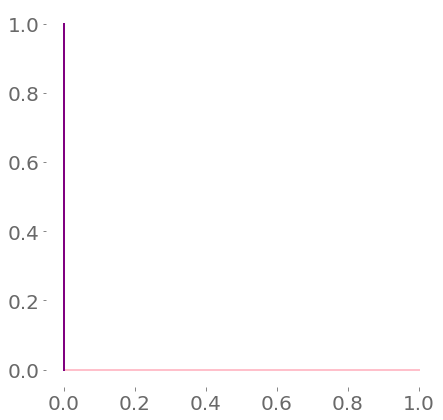

In [6]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

p0=[0,0]; p1=[1,0]; p2=[0,1];

line1 = [  [p0[0], p1[0]], [p0[1], p1[1]] ]
line2 = [  [p0[0], p2[0]], [p0[1], p2[1]] ]

ax.plot(line1[0], line1[1], color="pink")
ax.plot(line2[0], line2[1], color="purple")



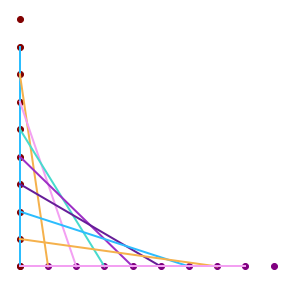

In [7]:
def get_base_fig(fig, ax, ip):
    npts = 10
    xx = np.linspace(0, 1, npts)

    line1 = [xx, [0]*len(xx)]
    line2 = [[0]*len(xx), xx[::-1]]
    #plt.xkcd(randomness=10)
    ax.plot(line1[0], line1[1], 'o', lw=1, color="purple")
    ax.plot(line2[0], line2[1], 'o', lw=1, color="maroon")
    ax.set_xticks([]); ax.set_yticks([]);
    
    for i in range(npts-1):
        ax.plot([line1[0][i], line2[0][(i+1)%npts]],
                [line1[1][i], line2[1][(i+1)%npts]])

fig, ax = plt.subplots(1,1, figsize=(5,5))
get_base_fig(fig, ax, 2)

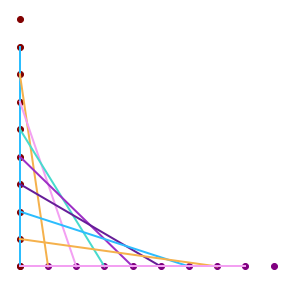

In [8]:
def get_base_fig(fig, ax, npts=10):
    xx  = np.linspace(0, 1, npts)
    xxp = np.cos(180*xx/np.pi) 
    
    line1 = [xx, [0]*len(xx)]
    line2 = [[0]*len(xx), xx[::-1]]

    ax.plot(line1[0], line1[1], 'o', lw=1, color="purple")
    ax.plot(line2[0], line2[1], 'o', lw=1, color="maroon")
    ax.set_xticks([]);
    ax.set_yticks([]);
    
    
    for i in range(npts-1):
        ax.plot([line1[0][i], line2[0][(i+1)%npts]],
                [line1[1][i], line2[1][(i+1)%npts]])
        
        
fig, ax = plt.subplots(1,1, figsize=(5,5))
get_base_fig(fig, ax)

In [12]:
def pts_on_line(point, origin = [0,0], npts = 10):
    pts = []
    for i in range(npts):
        delta = i * (point-np.array(origin))/ npts
        pts.append(list(origin+delta))
    return np.array(pts)

[[0.   0.  ]
 [0.1  0.05]
 [0.2  0.1 ]
 [0.3  0.15]
 [0.4  0.2 ]
 [0.5  0.25]
 [0.6  0.3 ]
 [0.7  0.35]
 [0.8  0.4 ]
 [0.9  0.45]] [[0.  0. ]
 [0.  0.1]
 [0.  0.2]
 [0.  0.3]
 [0.  0.4]
 [0.  0.5]
 [0.  0.6]
 [0.  0.7]
 [0.  0.8]
 [0.  0.9]]


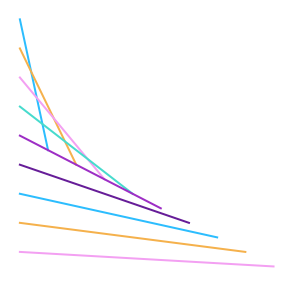

In [14]:

line1 = pts_on_line(point = [1,.5])
line2 = pts_on_line(point = [0,1])

def curve_from_line(line1, line2, npts=10):
    
    fig, ax = plt.subplots(1,1, figsize=(5,5))

    for i in range(1, npts):    
        plt.plot([line1[i][0],      line2[i][0]],
                 [line1[npts-i][1], line2[npts-i][1]])

    ax.set_xticks([]);
    ax.set_yticks([]);

print (line1, line2)
curve_from_line(line1, line2)

In [15]:
def get_lines(npts=10):

    xx  = np.linspace(0, 1, npts)

    line0 = np.zeros((npts,2))
    line1 = line0.copy()
    line1[:,0] = xx
    line2 = line0.copy()
    line2[:,1] = xx
    
    return line1, line2

In [16]:
def rotate(point, angle, origin=[0,0]):
    ox, oy = origin
    px, py = point
    qx = ox + cos(angle) * (px - ox) - sin(angle) * (py - oy)
    qy = oy + sin(angle) * (px - ox) + cos(angle) * (py - oy)
    return [qx, qy]

In [17]:
def rotate2(point, angle):
    px, py = point
    return [px * cos(angle*np.pi/180), py*sin(angle*np.pi/180.)]

In [18]:
p1  = [1,-1]
ang = 45
pp  = rotate(p1, ang)
pp2  = rotate2(p1, ang)
print (p1, pp, pp2)

[1, -1] [1.3762255133518482, 0.3255815357163887] [0.7071067811865476, -0.7071067811865475]


[1, 1] [0.7071067811865476, 0.7071067811865475]
[-0.29289322 -0.29289322]


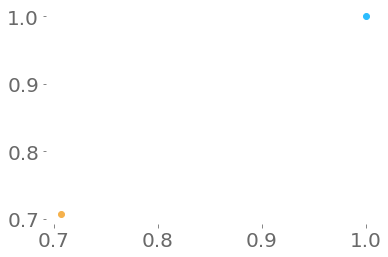

In [20]:
p1  = [1,1]
ang = 45
p2  = rotate2(p1, ang)
print (p1, p2)

plt.scatter([p1[0]], [p1[1]])
plt.scatter([p2[0]], [p2[1]])
#plt.xlim([0,1.5])
#plt.ylim([-.2,.2])

print (np.array(p2)-np.array(p1))


#( [ p1[0], p2[0]], [p1[1], p2[1]])

1
4
7
10
13
19
23
29


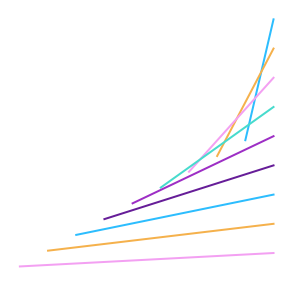

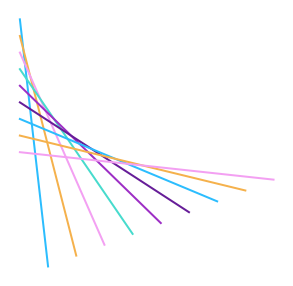

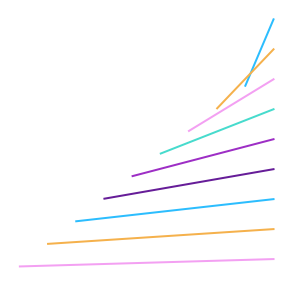

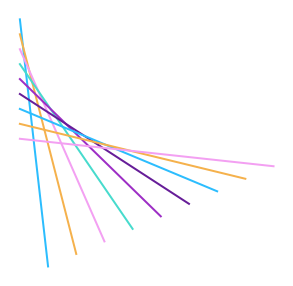

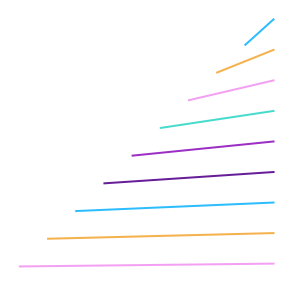

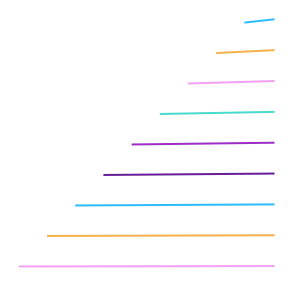

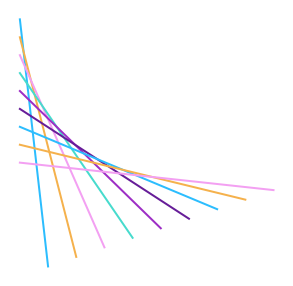

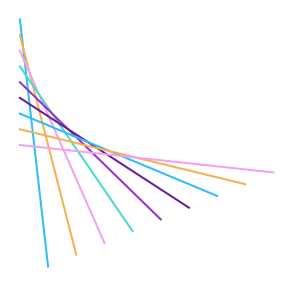

In [22]:
point = [0,1]

for angle in [1, 4, 7, 10, 13, 19, 23, 29]:
    point2 = rotate(point, angle)

    line1 = pts_on_line(point)
    line2 = pts_on_line(point2)
    print (angle)
    curve_from_line(line1, line2)

In [105]:
def plot_base_lines(pt1, pt2, origin=[0,0], ax=None, fig=None, color="blue"):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.plot( [origin[0], pt1[0]], [origin[1], pt1[1]], color=color, lw=2.)
    ax.plot( [origin[0], pt2[0]], [origin[1], pt2[1]], color=color, lw=2.)
    ax.set_xticks([]); ax.set_yticks([])
    
def pts_on_line(point, origin = [0,0], npts = 10):
    pts = []
    for i in range(npts+1):
        delta = i * (point-np.array(origin))/ npts
        pts.append(list(origin+delta))
    return np.array(pts)

def plot_dots_on_line(pts, ax, color="maroon"):
    ax.scatter(pts[:,0], pts[:,1], lw=4, color=color)

In [ ]:
def plot_lines_for_curves(pts1, pts2, ax):
    
    

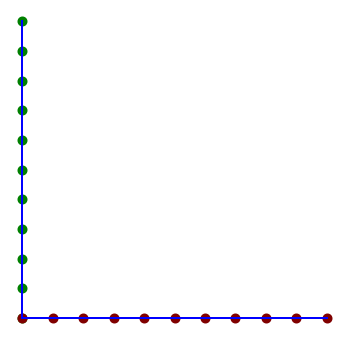

In [106]:
pt1 = [0,1]; pt2 = [1,0]
fig, ax = plt.subplots(1, 1, figsize=(6, 6));
pts1=pts_on_line(pt1)
pts2=pts_on_line(pt2)
plot_base_lines(pt1, pt2, ax=ax)
plot_dots_on_line(pts1, ax=ax, color="green")
plot_dots_on_line(pts2, ax=ax, color="maroon")

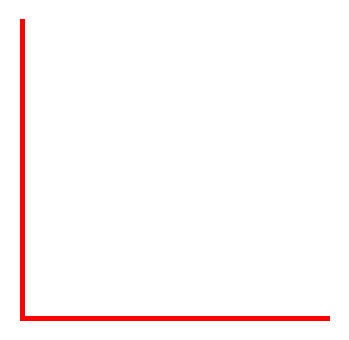

In [ ]:
pt = [1,0]
origin = [0,0]

pts = []
for ip in range(npts):
    
    

In [ ]:
def get_pts(pt, npts=3, origin=[0,0]):
    
    
    ax.plot( [origin[0], pt1[0]], [origin[1], pt1[1]], color='red', lw=5.)
    ax.plot( [origin[0], pt2[0]], [origin[1], pt2[1]], color='red', lw=5.)
    ax.set_xticks([]); ax.set_yticks([])

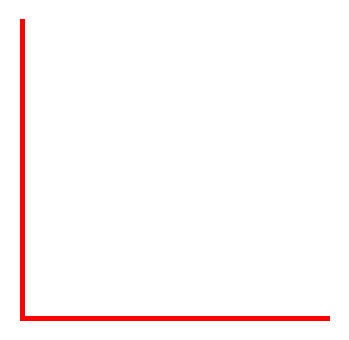

In [ ]:
def get_lines2(p1, p2, npts=10):
    

    xx  = np.linspace(0, 1, npts)

    line0 = np.zeros((npts,2))
    line1 = line0.copy()
    line1[:,0] = xx
    line2 = line0.copy()
    line2[:,1] = xx
    
    return line1, line2

In [ ]:
line1, line2 = get_lines(npts=10)
fig, ax = plt.subplots(1,1, figsize=(5,5))

for i in range(1, npts):    
    plt.plot([line1[i][0],      line2[i][0]],
             [line1[npts-i][1], line2[npts-i][1]])

ax.set_xticks([]);
ax.set_yticks([]);

In [ ]:
def animation_():    
    fig, ax = plt.subplots(figsize=(5, 5))
    xx = np.linspace(0, 1, 11)

    line1 = [xx, [0]*len(xx)]
    line2 = [[0]*len(xx), xx]

    npts = 10
    
    def update(mod):        

        line1_x = np.linspace(p1[0], p2[0], npts)
        line1_y = np.array([p1[1]]*npts)

        line2_x = np.linspace(p3[0], p4[0], npts)
        line2_y = np.array([p3[1]]*npts)


        ax.scatter(line1_x, line1_y, lw=2, color="pink")
        ax.scatter(line2_x, line2_y, lw=2, color="pink")


        for i in range(npts):
            i1 = i
            i2 = (i+mod)%npts

            x1, y1 = line1_x[i1], line1_y[i1]
            x2, y2 = line2_x[i2], line2_y[i2]
            
            
            (x1, x2, y1, y2) = transform_(x1,x2, y1, y2)
            
            ax.plot([x1,x2], [y1,y2], color="pink")

        #ax.set_xlim(-0.2,1.2)
        #ax.set_ylim(-0.2,1.2)
        #ax.set_xticks([])
        #ax.set_yticks([])
        
    savename="animation_tmp.mp4"
    anim = animation.FuncAnimation(fig, update, interval=20, frames=npts)
    anim.save(savename, writer=animation.FFMpegWriter(fps=4))
    
animation_()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

p0 = np.array([0,0])
p1 = np.array([1,0])
p2 = np.array([0,1])

line1 = np.array([p0,p1])
line2 = np.array([p0,p2])

ax.plot(line1[:,0], line1[:,1], '-', lw=2, color="purple")
ax.plot(line2[:,0], line2[:,1], '-', lw=2, color="pink")

npts = 10
line1_x = np.linspace(p0[0], p1[0], npts)
line1_y = np.array([p1[1]]*npts)

# line2_x = np.linspace(p3[0], p4[0], npts)
# line2_y = np.array([p3[1]]*npts)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

p1 = np.array([0,0])
p2 = np.array([1,0])
p3 = np.array([0,1])
p4 = np.array([1,1])

line1 = np.array([p1,p2])
line2 = np.array([p3,p4])

ax.plot(line1[:,0], line1[:,1], '-', lw=2)
ax.plot(line2[:,0], line2[:,1], '-', lw=2)


npts = 10

line1_x = np.linspace(p1[0], p2[0], npts)
line1_y = np.array([p1[1]]*npts)

line2_x = np.linspace(p3[0], p4[0], npts)
line2_y = np.array([p3[1]]*npts)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

line1 = [[0,1], [0,0]]
line2 = [[0,1],[1,1] ]

ax.plot(line1[0], line1[1])
ax.plot(line2[0], line2[1])

ax.scatter(line1[0], line1[1], color='red')

ax.set_xlim(-0.2,1.2)
ax.set_ylim(-0.2,1.2)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

p1 = np.array([0,0])
p2 = np.array([1,0])
p3 = np.array([0,1])
p4 = np.array([1,1])

line1 = np.array([p1,p2])
line2 = np.array([p3,p4])

ax.plot(line1[:,0], line1[:,1], '-', lw=2)
ax.plot(line2[:,0], line2[:,1], '-', lw=2)


npts = 10

line1_x = np.linspace(p1[0], p2[0], npts)
line1_y = np.array([p1[1]]*npts)

line2_x = np.linspace(p3[0], p4[0], npts)
line2_y = np.array([p3[1]]*npts)


ax.scatter(line1_x, line1_y, lw=2, color="r")
ax.scatter(line2_x, line2_y, lw=2, color="r")


for i in range(npts):
    i1 = i
    i2 = (i+5)%npts
    
    x1, y1 = line1_x[i1], line1_y[i1]
    x2, y2 = line2_x[i2], line2_y[i2]

    ax.plot([x1,x2], [y1,y2], color="gray")


ax.set_xlim(-0.2,1.2)
ax.set_ylim(-0.2,1.2)

In [ ]:
def transform_(x1,x2, y1, y2):
    
    return (x1,x2,y1,y2)
    
    #return sin(180*x1/pi)+sin(180*x2/pi), sin(180*x1/pi)-sin(180*x2/pi), y1, y2#cos(180*y1/pi), cos(180*y2/pi)

In [ ]:
def animation_():    
    fig, ax = plt.subplots(figsize=(10, 6))
    p1 = np.array([0,0])
    p2 = np.array([1,0])
    p3 = np.array([0,1])
    p4 = np.array([1,1])

    npts = 40
    
    def update(mod):
        #fig, ax = plt.subplots(1,1, figsize=(10,6))
        ax.clear()

        line1 = np.array([p1,p2])
        line2 = np.array([p3,p4])

        #ax.plot(line1[:,0], line1[:,1], '-', lw=2, c='blue')
        #ax.plot(line2[:,0], line2[:,1], '-', lw=2, c='blue')



        line1_x = np.linspace(p1[0], p2[0], npts)
        line1_y = np.array([p1[1]]*npts)

        line2_x = np.linspace(p3[0], p4[0], npts)
        line2_y = np.array([p3[1]]*npts)


        ax.scatter(line1_x, line1_y, lw=2, color="pink")
        ax.scatter(line2_x, line2_y, lw=2, color="pink")


        for i in range(npts):
            i1 = i
            i2 = (i+mod)%npts

            x1, y1 = line1_x[i1], line1_y[i1]
            x2, y2 = line2_x[i2], line2_y[i2]
            
            
            (x1, x2, y1, y2) = transform_(x1,x2, y1, y2)
            
            ax.plot([x1,x2], [y1,y2], color="pink")

        #ax.set_xlim(-0.2,1.2)
        #ax.set_ylim(-0.2,1.2)
        #ax.set_xticks([])
        #ax.set_yticks([])
        
    savename="animation_tmp.mp4"
    anim = animation.FuncAnimation(fig, update, interval=20, frames=npts)
    anim.save(savename, writer=animation.FFMpegWriter(fps=4))
    
animation_()

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt

theta=np.arange(0,2*np.pi,2*np.pi/400)

a= 1.0      #semi-major axis
r = 10.
e1 = 2.
e2 = 3. 

def get_r(theta, e, a):
    return a*(e**2 - 1)/(1+e*np.cos(theta))

def get_theta(r, e, a):
    return np.arccos((a*(e**2 - 1) -r)/(e*r))

offset1 = get_theta(r, e1, a)
offset2 = get_theta(r, e2, a)

ax = plt.subplot(111, polar=True)
ax.plot(theta, get_r(theta, e1, a), color='r', linewidth=2)
ax.plot(theta, get_r(theta - offset2 + offset1, e2, a), color='b', linewidth=2)
ax.set_rmax(60.0)
ax.grid(True)
#plt.legend()
plt.show()

In [ ]:
def transform_(x1,x2, y1, y2):
    # Do nothing
    #xx = [x1,x2]
    #yy = [y1,y2]
    #return (xx, yy)
    
    # parabola
    a = 1
    if x1==x2:
        b=2
    else:
        b = a * (y2**2 - y1**2) / (x1**2-x2**2)
    
    xx=np.linspace(x1,x2, 10)   
    yy = b**2 * (1-xx**2/a**2)
    
    return (xx, yy)
    
    #return sin(180*x1/pi)+sin(180*x2/pi), sin(180*x1/pi)-sin(180*x2/pi), y1, y2#cos(180*y1/pi), cos(180*y2/pi)

In [ ]:
def animation_2():    
    fig, ax = plt.subplots(figsize=(10, 6))
    p1 = np.array([0,0])
    p2 = np.array([1,0])
    p3 = np.array([0,1])
    p4 = np.array([1,1])

    npts = 40
    
    def update(mod):
        #fig, ax = plt.subplots(1,1, figsize=(10,6))
        ax.clear()

        line1 = np.array([p1,p2])
        line2 = np.array([p3,p4])

        #ax.plot(line1[:,0], line1[:,1], '-', lw=2, c='blue')
        #ax.plot(line2[:,0], line2[:,1], '-', lw=2, c='blue')



        line1_x = np.linspace(p1[0], p2[0], npts)
        line1_y = np.array([p1[1]]*npts)

        line2_x = np.linspace(p3[0], p4[0], npts)
        line2_y = np.array([p3[1]]*npts)


        ax.scatter(line1_x, line1_y, lw=2, color="pink")
        ax.scatter(line2_x, line2_y, lw=2, color="pink")


        for i in range(npts):
            i1 = i
            i2 = (i+mod)%npts

            x1, y1 = line1_x[i1], line1_y[i1]
            x2, y2 = line2_x[i2], line2_y[i2]
            
            
            (xx, yy) = transform_(x1,x2, y1, y2)
            
            ax.plot(xx, yy, color="pink")

        #ax.set_xlim(-0.2,1.2)
        ax.set_ylim(-0.2,1000)
        #ax.set_xticks([])
        #ax.set_yticks([])
        
    savename="animation_tmp.mp4"
    anim = animation.FuncAnimation(fig, update, frames=npts)
    anim.save(savename, writer=animation.FFMpegWriter(fps=4))
    
animation_2()